### Cenditya Ayu Aurelia 
### Kelas Fibonacci
### NPM 20083010023
### Ujian Praktik Data Science

# Analisis Prediksi Harga Saham Tertinggi PT Telkom dengan Menggunakan Metode ARIMA

# 1. Import Library

Import library terlebih dahulu yang akan digunakan

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
from math import sqrt

import warnings
warnings.filterwarnings('ignore')

# 2. Import Dataset

Import dataset dengan menggunakan data TLKM.JK.csv yang dapat di download [disini](https://drive.google.com/file/d/10OwSp3vmo3fd67mvCfhKvUrGJMzVWJjf/view?usp=sharing). Setelah itu, langkah selanjutnya adalah membaca/loading dataset TLKM.JK.csv dengan menggunakan perintah read_csv pada fungsi pandas.

In [79]:
data = pd.read_csv("TLKM.JK.csv")

In [80]:
# Menampilkan data TLKM.JK
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output tabel diatas, menunjukkan jumlah data pada dataset terdapat 1422 baris dan 7 kolom.

# 3. Preprocessing Data

Sebelum melakukan tahap selanjutnya, data harus dipersiapkan terlebih dahulu agar siap untuk diolah dengan tujuan meminimalkan kesalahan dan mengoptimalkan model yang akan dihasilkan. 

In [81]:
# Menampilkan 5 baris teratas dari dataset
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0


In [82]:
# Menampilkan 5 baris terakhir dari dataset
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.0,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.0,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.0,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.0,175300400.0
1421,2022-09-01,4560.0,4650.0,4530.0,4580.0,4580.0,120871700.0


In [83]:
# Menampilkan deskriptif statistik data dari masing-masing kolom yang bertipe numerik
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1421.000000,1421.000000,1421.000000,1421.000000,1421.000000,1.421000e+03
mean,3827.741027,3869.106263,3785.608726,3827.171006,3416.287764,1.021061e+08
std,490.449096,487.302987,492.470774,492.369542,462.616891,6.629501e+07
min,2550.000000,2590.000000,2450.000000,2560.000000,2289.641846,0.000000e+00
25%,3450.000000,3490.000000,3400.000000,3450.000000,3111.957031,6.168190e+07
50%,3870.000000,3900.000000,3840.000000,3870.000000,3357.914063,8.730300e+07
75%,4190.000000,4220.000000,4150.000000,4190.000000,3708.230957,1.234112e+08
max,4850.000000,4850.000000,4780.000000,4800.000000,4750.000000,6.241426e+08


In [84]:
# Mengetahui informasi umum dari dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1422 entries, 0 to 1421
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1422 non-null   object 
 1   Open       1421 non-null   float64
 2   High       1421 non-null   float64
 3   Low        1421 non-null   float64
 4   Close      1421 non-null   float64
 5   Adj Close  1421 non-null   float64
 6   Volume     1421 non-null   float64
dtypes: float64(6), object(1)
memory usage: 77.9+ KB


In [85]:
# Menampilkan semua nilai unik pada Date dengan menggunakan fungsi unique untuk mengetahui apa yang terjadi pada Date yang bertipe object
data['Date'].unique() 

array(['2017-01-02', '2017-01-03', '2017-01-04', ..., '2022-08-30',
       '2022-08-31', '2022-09-01'], dtype=object)

In [86]:
# Menampilkan ukuran dimensi dari dataset
data.shape

(1422, 7)

Dari output diatas, ukuran dimensi yang dihasilkan terdapat 1422 jumlah baris dan 7 jumlah kolom dari dataset

In [87]:
# Mengetahui adanya data yang duplikat
data.duplicated().sum()

0

Dari output diatas, tidak terdapat duplikat pada data

In [88]:
# Memeriksa missing values
data.isnull().sum() 

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

Dari output diatas terdapat data yang mengandung missing value, maka dari itu perlu ditangani agar algoritma dapat bekerja dengan baik jika dataset tidak berisi missing value. Berikut adalah caranya untuk menghapus beberapa data yang mengandung missing values dengan menggantikan atau replace nilai missing values :

In [89]:
mean = data["Open"].mean()
data["Open"] = data["Open"].replace(np.nan, mean) 
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output diatas, mencari mean dari kolom "Open" menggunakan metode mean(). Kemudian mengganti nilai missing values tersebut di kolom "Open" dengan mean menggunakan metode replace()

In [90]:
mean = data["High"].mean()
data["High"] = data["High"].replace(np.nan, mean) 
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output diatas, mencari mean dari kolom "High" menggunakan metode mean(). Kemudian mengganti nilai missing values tersebut di kolom "High" dengan mean menggunakan metode replace()

In [91]:
mean = data["Low"].mean()
data["Low"] = data["Low"].replace(np.nan, mean) 
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output diatas, mencari mean dari kolom "Low" menggunakan metode mean(). Kemudian mengganti nilai missing values tersebut di kolom "Low" dengan mean menggunakan metode replace()

In [92]:
mean = data["Close"].mean()
data["Close"] = data["Close"].replace(np.nan, mean) 
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output diatas, mencari mean dari kolom "Close" menggunakan metode mean(). Kemudian mengganti nilai missing values tersebut di kolom "Close" dengan mean menggunakan metode replace()

In [93]:
mean = data["Adj Close"].mean()
data["Adj Close"] = data["Adj Close"].replace(np.nan, mean) 
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output diatas, mencari mean dari kolom "Adj Close" menggunakan metode mean(). Kemudian mengganti nilai missing values tersebut di kolom "Adj Close" dengan mean menggunakan metode replace()

In [94]:
mean = data["Volume"].mean()
data["Volume"] = data["Volume"].replace(np.nan, mean) 
data 

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
1,2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2,2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
3,2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
4,2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...,...
1417,2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
1418,2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
1419,2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0
1420,2022-08-31,4420.0,4600.0,4420.0,4560.0,4560.000000,175300400.0


Dari output diatas, mencari mean dari kolom "Volume" menggunakan metode mean(). Kemudian mengganti nilai missing values tersebut di kolom "Volume" dengan mean menggunakan metode replace()

In [95]:
# Setelah melakukan tahapan diatas, selanjutnya adalah memeriksa kembali apakah masih terdapat missing values pada data
data.isnull().sum() 

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Dari output diatas menampilkan bahwa tidak terdapat missing values dalam dataset sehingga dapat diartikan data tersebut sudah aman. Selanjutnya adalah melakukan Eksplorasi Data.




# 4. Eksplorasi Data

In [96]:
# Melihat tipe data pada dataframe
type(data) 

pandas.core.frame.DataFrame

In [97]:
data.isnull().sum()/len(data) 

Date         0.0
Open         0.0
High         0.0
Low          0.0
Close        0.0
Adj Close    0.0
Volume       0.0
dtype: float64

In [98]:
# Mengubah tanggal menjadi index
con = data['Date']
data['Date']=pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Memeriksa datatype pada index
data.index

DatetimeIndex(['2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05',
               '2017-01-06', '2017-01-09', '2017-01-10', '2017-01-11',
               '2017-01-12', '2017-01-13',
               ...
               '2022-08-19', '2022-08-22', '2022-08-23', '2022-08-24',
               '2022-08-25', '2022-08-26', '2022-08-29', '2022-08-30',
               '2022-08-31', '2022-09-01'],
              dtype='datetime64[ns]', name='Date', length=1422, freq=None)

In [99]:
# Menampilkan data yang sudah diubah pada Date menjadi Index
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-02,3980.0,3980.0,3980.0,3980.0,3310.131592,0.0
2017-01-03,3950.0,3990.0,3920.0,3950.0,3285.180664,71660600.0
2017-01-04,3880.0,3980.0,3880.0,3950.0,3285.180664,68494500.0
2017-01-05,3960.0,4030.0,3940.0,3950.0,3285.180664,74018400.0
2017-01-06,3970.0,4010.0,3960.0,4000.0,3326.765381,44136900.0
...,...,...,...,...,...,...
2022-08-26,4510.0,4540.0,4480.0,4490.0,4490.000000,184317100.0
2022-08-29,4370.0,4550.0,4360.0,4520.0,4520.000000,101529800.0
2022-08-30,4580.0,4620.0,4480.0,4480.0,4480.000000,118884300.0


Dari output diatas, dapat dilihat perbedaannya bahwa output diatas date diubah menjadi index

In [100]:
# Menghapus column selain High untuk melihat pergerakan saham pada data High
data = data.drop(['Open','Low','Close','Adj Close','Volume'],axis='columns')

In [101]:
# Melihat tipedata pada data High
print(data.dtypes)

High    float64
dtype: object


In [102]:
# Menampilkan data High dengan index nya adalah Date
data

,High
Date,
2017-01-02,3980.0
2017-01-03,3990.0
2017-01-04,3980.0
2017-01-05,4030.0
2017-01-06,4010.0
...,...
2022-08-26,4540.0
2022-08-29,4550.0
2022-08-30,4620.0


Selanjutnya adalah melakukan visualisasi data untuk memberikan informasi pada data.

# 5. Visualisasi Data

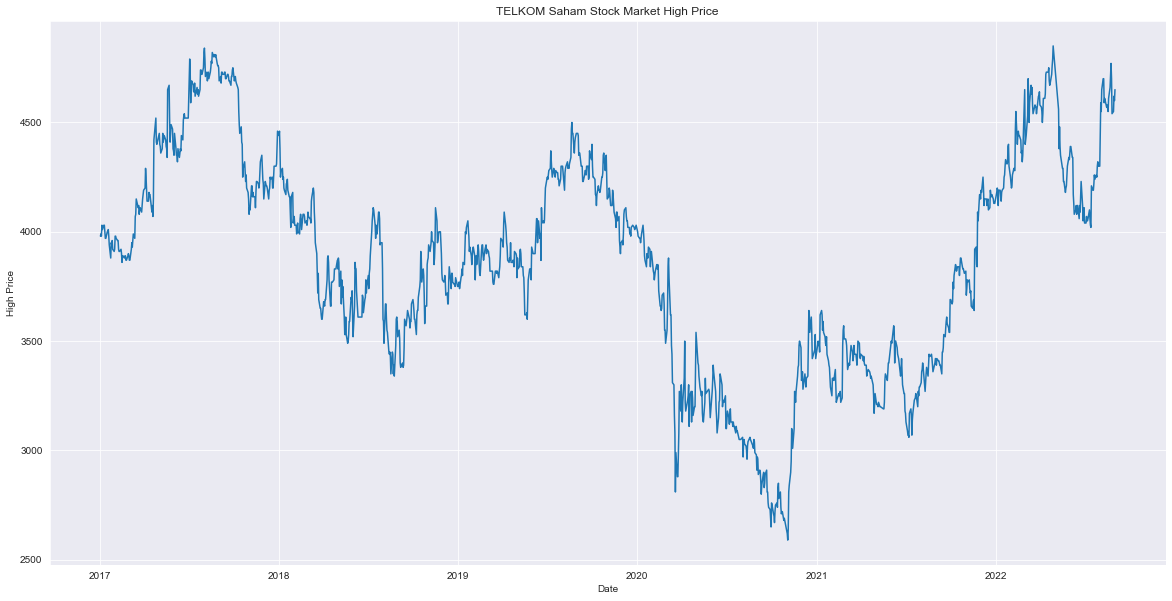

In [104]:
# Melakukan visualisasi dataset
plt.figure(figsize=(20,10))
sns.set_style('darkgrid')
plt.xlabel('Date')
plt.ylabel('High Price')
plt.title('TELKOM Saham Stock Market High Price')
plt.plot(data['High']) 

Dari grafik diatas, hasil visualisasi data untuk melihat High Price pada setiap periode dapat dilihat bahwa :
1. Data belum stasioner sehingga pergerakannya tidak mengikuti rata-rata suatu nilai konstan
2. Tidak ada musiman (seasonal) yang artinya pola yang terbentuk tidak berulang pada musim waktu tertentu
3. Pergerakan trend setiap periode tahun tidak stabil ada kenaikan dan penurunan trend

Selanjutnya, melakukan Uji Stasioneritas Data.

### Uji Stasioneritas Data

In [105]:
# Menginisialkan variabel High sebagai data time series
ts = data['High']
ts.head(10)

Date
2017-01-02    3980.0
2017-01-03    3990.0
2017-01-04    3980.0
2017-01-05    4030.0
2017-01-06    4010.0
2017-01-09    4030.0
2017-01-10    4030.0
2017-01-11    4000.0
2017-01-12    3970.0
2017-01-13    3970.0
Name: High, dtype: float64

In [106]:
# Deklarasi fungsi untuk mengecek stasioneritas data dengan menggunakan Uji Dickey-Fuller Test
def test_stationarity(timeseries):
    
    # Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean() 
    rolstd = timeseries.rolling(window=12).std()

    # Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    

    # Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

Uji Hipotesis:

H0 : Data tidak stasioner

Ha : Data stasioner

Tolak H0 apabila diperoleh p-value < alpha (0,05)

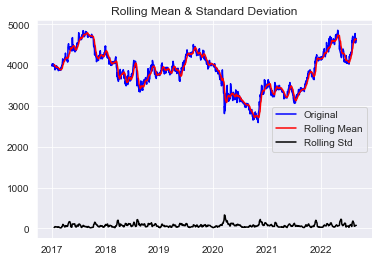

Results of Dickey-Fuller Test:
Test Statistic                   -1.789795
p-value                           0.385540
#Lags Used                        2.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [107]:
# Melakukan uji stasioneritas untuk dataset
test_stationarity(ts) 

Dari grafik diatas, diperoleh informasi bahwa :
1. Nilai p-value pada saham TLKM yaitu 0,385540 > 0,05 yang berarti H0 tidak ditolak. Maka dari itu, data memiliki keadaan yang tidak stasioner.
2. Data belum stasioner maka perlu dilakukan proses stasionerisasi data, yaitu melakukan proses differencing untuk memperoleh data yang stasioner.

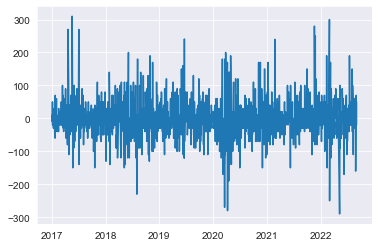

In [108]:
ts_diff_1 = ts - ts.shift()
ts_diff_1 = ts_diff_1.dropna()
plt.plot(ts_diff_1) 

Dari grafik diatas dapat dilihat bahwa setelah dilakukan proses stasionerisasi data, pergerakan datanya sudah disekitar rata-rata

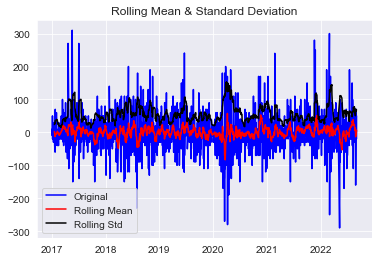

Results of Dickey-Fuller Test:
Test Statistic                  -29.780631
p-value                           0.000000
#Lags Used                        1.000000
Number of Observations Used    1419.000000
Critical Value (1%)              -3.434967
Critical Value (5%)              -2.863579
Critical Value (10%)             -2.567856
dtype: float64


In [109]:
# Melakukan uji stasioneritas untuk dataset
test_stationarity(ts_diff_1)

Dari grafik diatas, setelah dilakukan proses differencing dan diuji stasioneritas data (setelah differencing), diperoleh data setelah differencing 1x telah membentuk data yang stasioner. Hal tersebut dapat dilihat dari p-valuenya yaitu 0.000000 bahwa p-value < 0,05 yang artinya sesuai dengan keterangan pada uji hipotesis. Kemudian, dapat dilihat juga pada test statistics = -29.780631 < -2.863579 yang artinya pada tingkat konfidensi 95%, data sudah tergolong stasioner.

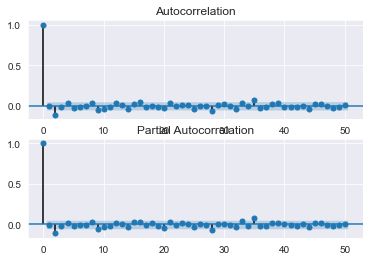

In [110]:
# Melakukan plot ACF dan PACF
plt.figure()
plt.subplot(211)
plot_acf(ts_diff_1, ax=plt.gca(), lags=50)
plt.subplot(212)
plot_pacf(ts_diff_1, ax=plt.gca(), lags=50)
plt.show()

Dari grafik diatas, plot ACF dan plot PACF dibentuk untuk mengetahui orde dari AR dan MA, sehingga bisa diketahui model yang sesuai untuk data.

# 6. Modelling

Membuat model dengan menggunakan metode ARIMA dimana data trainingnya adalah 70%. Kemudian, mengevaluasi kombinasi nilai p, d dan q untuk model ARIMA dan memperoleh best model ARIMA yang dihasilkan dari data Saham Telkom

In [111]:
def evaluate_arima_model(X, arima_order):
	# prepare training dataset
	X = X.astype('float32')
	train_size = int(len(X) * 0.7)     # data training yang digunakan adalah 70%
	train, test = X[0:train_size], X[train_size:]
	history = [x for x in train]
	# make predictions
	predictions = list()
	for t in range(len(test)):
		model = ARIMA(history, order=arima_order)
		model_fit = model.fit()
		yhat = model_fit.forecast()[0]
		predictions.append(yhat)
		history.append(test[t])
	# calculate out of sample error
	rmse = sqrt(mean_squared_error(test, predictions))
	return rmse

# evaluate combinations of p, d and q values for an ARIMA model
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(dataset, p_values, d_values, q_values):
	dataset = dataset.astype('float32')
	best_score, best_cfg = float("inf"), None
	for p in p_values:
		for d in d_values:
			for q in q_values:
				order = (p,d,q)
				try:
					rmse = evaluate_arima_model(dataset, order)
					if rmse < best_score:
						best_score, best_cfg = rmse, order
					print('ARIMA%s RMSE=%.3f' % (order,rmse))
				except:
					continue
	print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

# 7. Evaluation

In [112]:
# Melakukan evaluasi model untuk mengetahui best model ARIMA
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)
warnings.filterwarnings("ignore")
evaluate_models(ts.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) RMSE=497.555
ARIMA(0, 0, 1) RMSE=269.919
ARIMA(0, 1, 0) RMSE=61.315
ARIMA(0, 1, 1) RMSE=61.386
ARIMA(0, 1, 2) RMSE=60.693
ARIMA(1, 0, 0) RMSE=61.286
ARIMA(1, 0, 1) RMSE=61.364
ARIMA(1, 0, 2) RMSE=60.703
ARIMA(1, 1, 0) RMSE=61.372
ARIMA(1, 1, 1) RMSE=61.474
ARIMA(1, 1, 2) RMSE=60.845
ARIMA(2, 0, 0) RMSE=61.348
ARIMA(2, 0, 1) RMSE=61.431
ARIMA(2, 0, 2) RMSE=60.826
ARIMA(2, 1, 0) RMSE=60.647
ARIMA(2, 1, 1) RMSE=60.814
ARIMA(2, 1, 2) RMSE=60.852
Best ARIMA(2, 1, 0) RMSE=60.647


Dari output diatas, setelah dilakukan percobaan dengan model ARIMA (p,d,q) dengan:

- orde p = 0 dan 2
- orde d = 0 dan 1
- orde q = 0 dan 0

Diperoleh bahwa best model ARIMA yang dihasilkan adalah dari model ARIMA yang paling terkecil, yaitu (2,1,0) dengan RMSE=60.647. Hal ini sesuai dengan plot ACF dan PACF yang dies down setelah lag ke-1 dan dataset telah mengalami 1x proses differencing

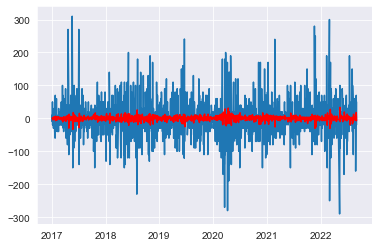

In [113]:
# Visualisasi perbandingan antara dataset setelah differencing dengan data hasil prediksi ARIMA(2,1,0)
model_ARIMA = ARIMA(ts, order=(2,1,0))
results_ARIMA = model_ARIMA.fit(disp=-1)
predictions_ARIMA = pd.Series(results_ARIMA.fittedvalues,copy=True)
plt.plot(ts_diff_1)             
plt.plot(predictions_ARIMA, color='red')  

# 8. Kebaikan Model yang Dihasilkan

In [114]:
# Informasi yang diperoleh dari pemodelan ARIMA(2,1,0) pada dataset
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 1421
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -7835.687
Method:                       css-mle   S.D. of innovations             60.055
Date:                Sat, 17 Sep 2022   AIC                          15679.375
Time:                        19:37:40   BIC                          15700.411
Sample:                             1   HQIC                         15687.233
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.4695      1.428      0.329      0.742      -2.329       3.268
ar.L1.D.High    -0.0070      0.026     -0.265      0.791      -0.059       0.045
ar.L2.D.High    -0.1091      0.026     -4.138      0.000      -0.161      -0.057
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.0320           -3.0276j            3.0278           -0.2517
AR.2           -0.0320           +3.0276j            3.0278            0.2517
-----------------------------------------------------------------------------
"""

Dari output diatas, dapat dilihat bahwa :
- AIC yang dihasilkan adalah 15679.375 dimana hasil tersebut dapat menunjukkan bahwa AIC terkecil menandakan model yang paling baik
- ar1 high yang dihasilkan memiliki coef sebesar -0.0070 dan ar2 high memiliki coef sebesar -0.1091

# 9. Prediksi Data

In [116]:
# Prediksi data dengan model ARIMA(2,1,0) untuk 4 hari ke depan
predict_dif = results_ARIMA.predict(start=1422,end=1426)
predictions_dif_cum_sum = predict_dif.cumsum()                   #prediksi differencingnya
pred_ts = [ts[-1]]
for i, j in enumerate(predictions_dif_cum_sum):                  #prediksi data aslinya
  a = pred_ts[i] + j
  pred_ts.append(a)
predict = pd.Series(pred_ts[1:], index=predict_dif.index)
print(predict) 

1421    4652.356231
1422    4649.765994
1423    4647.477292
1424    4646.250034
1425    4645.506460
dtype: float64


**Kesimpulan**

Berdasarkan hasil prediksi data pada saat melakukan pemodelan dengan menggunakan metode ARIMA dengan data training yang digunakan adalah 70% diperoleh bahwa data yang telah dilakukan differencing 1x dan membentuk data stasioner yang menghasilkan best model ARIMA yaitu (2,1,0) dengan RMSE=60.647 dimana hal tersebut sudah sesuai dengan plot ACF dan PACF setelah lag ke-1 dan dataset telah mengalami 1x proses differencing. Dari best model ARIMA tersebut dapat memprediksikan data saham tertinggi pada Telkom untuk 4 hari kedepan dengan tipe datanya adalah float, yaitu :

1. Hari 1421 dengan harga saham tertinggi 4652.356231
2. Hari 1422 dengan harga saham tertinggi 4649.765994
3. Hari 1423 dengan harga saham tertinggi 4647.477292
4. Hari 1424 dengan harga saham tertinggi 4646.250034
5. Hari 1425 dengan harga saham tertinggi 4645.506460

